## <b>Analyze Jeju : 제주도 금융 데이터 분석</b>
### 지역 & 연령별 가계수지지표 (Household Income Index, 이하 hi) 및 위치좌표 시각화를 활용한 인사이트 탐색<br><br>

In [1]:
# 패키지 import 

import pandas as pd
import os
import matplotlib.pyplot as plt


#### 가계수지지표: Household Income Index, 가계소비성향과 적자여부를 파악하는 재무지표

* 산출식은 [가계지출(고정+변동)/ 가계소득] 으로 <br>본 분석에서는 데이터 상의<u>3개월 평균 카드사용데이터와 연평균소득의 월별 환산치</u>로 이를 산출하였다.
* Hi > 1 이상인 경우, 소비가 소득을 초과하여 가계 재정이 적자 상태에 있음을 의미한다.
* 위험도별 분포를 제주특별자치도 지도 상에 표시하여 분포를 확인한다.
* 앞서 언급한 고위험군을 다각도로 분석한다.

In [2]:
# 작업 디렉토리 변경
os.chdir(r'C:/Users/jhbea/OneDrive/바탕 화면/Danalyze') 

In [3]:
# 제주 금융데이터 파일 dataframe생성
dfjj=pd.read_csv('jeju_financial_life_data.csv')

In [4]:
# 결측치 확인 
dfjj.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
zip_cd                 10422 non-null int64
year_month             10422 non-null int64
x_axis                 10422 non-null float64
y_axis                 10422 non-null float64
sex                    10422 non-null int64
age                    10422 non-null int64
job_majorc             10422 non-null float64
job_smallc             10422 non-null float64
job_public             10422 non-null float64
job_profession         10422 non-null float64
job_self               10422 non-null float64
job_none               10422 non-null float64
job_other              10422 non-null float64
avg_income             10422 non-null int64
med_income             10422 non-null int64
avg_spend              10422 non-null int64
avg_foreign_spend      10422 non-null int64
avg_debt               10422 non-null int64
avg_debt_credit        10422 non-null int64
avg_debt_noneb         10422 non-null

* 년/월 정보와 우편번호데이터는 본 분석과정에 불필요하므로 column을  제거해준다.

In [5]:
dfjj = dfjj.drop(columns=['zip_cd','year_month'])

#size 확인
dfjj.shape

(10422, 25)

* 고객군별 평균 연 소득(avg_income)과 3개월 평균 카드 사용데이터(avg_spend)를 이용하여 <br>가계수지를 계산한다.

In [6]:
# Household Index 계산을 위해 dfhi를 생성한다. 
dfhi=dfjj.loc[:,['x_axis','y_axis','avg_income','avg_spend']]

통계청의 2014년 가계동향조사와 가계금융복지조사를 기초 자료로 삼아<br> 주소현(이화여대), 차경욱(성신여대), 김민정(충북대), 김소연(서울대) 교수가 참여한 2014년 한국 가계모형 연구에 의하면<br> 일반적으로 가계수지 70%을 준거로 삼아 소비성향과 적자여부를 판단한다.<br>
[참고링크 : http://www.fpkorea.com/2014/kfpa_2015/sub/print.asp?p_bm_key=194&p_bd_key=13068 ]
* 위 기준을 참고하여 0~0.7, 0.7~1.0 , 1.0 이상 세 구간으로 분류하였다.  

In [7]:
hi = dfhi.avg_spend / ( dfhi.avg_income/12 + 1 ) # Household Income Index
dfdef = dfhi[ hi > 1 ].copy() # deficit: 적자상태를 의미 
dfdan = dfhi[(hi <= 1) & (hi >= 0.7) ].copy() #danger: 위험군 
dfwell = dfhi[(hi >= 0) & (hi < 0.7) ].copy() # managed well

In [8]:
#분포를 수치로 확인
print(len(dfdef.index))
print(len(dfdan.index))
print(len(dfwell.index))

dfdef.head(5)

7570
1049
1803


,x_axis,y_axis,avg_income,avg_spend
2,126.497121,33.247225,32119000,3529667
4,126.497121,33.247225,29578000,5209689
5,126.497121,33.247225,35110000,4391377
7,126.497121,33.247225,62822000,35279651
8,126.434900,33.260917,42894000,3876721


* folium 패키지를 이용하여 지도상에 각 구간에 해당하는 표본 그룹을 Marking하여 분포를 확인한다.<br>(적자인 경우 <u>red</u>, 위험군인 경우 <u>yellow</u>, 적정수준인 경우 <u>green</u> 을 icon color로 적용한다)

In [9]:
import folium 
from folium.plugins import MarkerCluster #지도상의 mark들을 clustering해준다.

In [10]:
m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담을 지도 좌표의 중심으로 설정하였다.
    zoom_start=10.5
)
# dfdef 추가 
for i in range(0,len(dfdef.index)-1):
    folium.Marker(
        location=[dfdef.iloc[i,1],dfdef.iloc[i,0]] ,
        popup='deficit',
        icon=folium.Icon(color='red',icon='circle')
        
    ).add_to(m)
    
# dfdan 추가   
for i in range(0,len(dfdan.index)-1):
    folium.Marker(
        location=[dfdan.iloc[i,1],dfdan.iloc[i,0]] ,
        popup='danger',
        icon=folium.Icon(color='orange',icon='circle')
        
    ).add_to(m)
    
# dfwell 추가   
for i in range(0,len(dfwell.index)-1):
    folium.Marker(
        location=[dfwell.iloc[i,1],dfwell.iloc[i,0]] ,
        popup='managed well',
        icon=folium.Icon(color='green',icon='circle')
        
    ).add_to(m)    
    
        
m.save('indexmap.html')

C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: color argument of Icon should be one of: {'lightgreen', 'red', 'lightred', 'darkred', 'purple', 'darkblue', 'pink', 'white', 'lightgray', 'blue', 'cadetblue', 'green', 'darkgreen', 'lightblue', 'gray', 'black', 'darkpurple', 'orange', 'beige'}.


In [11]:
# # 주석을 제거하고 아래 변수를 실행하면 지도를 확인 가능하다
# m

* 인사이트 도출을 위하여, <br>가계수지지표 기준, 적자 상태인 dfdef만을 지도상에 표시 및 Mark clustering 하여 <br>제주도 내 지역별 분포를 파악한다.

In [12]:
himap = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담의 좌표
    zoom_start=10.5
)
marker_cluster = MarkerCluster().add_to(himap)

for i in range(0,len(dfdef.index)-1):
    folium.Marker(
        location=[dfdef.iloc[i,1],dfdef.iloc[i,0]] ,
        popup='deficit',
        icon=folium.Icon(color='red',icon='circle')
        
    ).add_to(marker_cluster)

himap.save('defmap.html')    

### 지도상에 시각화 된 데이터 확인 전, 가계수지 적자집단의 지역별 분포에 대한 예상
* [예상1] 비교적 안정적인 직장을 가졌을 것이라 생각되는 도심지에 비해 ,<br>농/어업 종사자 등 소득이 비교적 불안정하다 생각되는 인구가 많을 동부 와 서부 읍면 지역에 적자집단이 많을 것이다. 


In [14]:
# # 주석을 제거하고 아래 변수를 실행하면 지도를 확인 가능하다
#himap

#### 가계수지지표 적자집단 분포지도를 통해 확인한 사실
* 가계지표가 적자인 집단은 제주시에 집중되어 있다.( 약 62% =4662/7570 )<br>서귀포시 역시 약 12%(889/7570) 를 차지 하여<br>실제 데이터에서 [예상1] 이 틀렸음을 확인하였다. 
<br><br><br><br>

* 위 사실에 기반하여 추론해 볼 때 도심지 주민들의 경우 대출의 규모가 다른 지역에 비해 클 것으로 예상할 수 있다. 
* 대출규모 상위 30%의 분포를 지도 상으로 확인해 본다.

In [41]:
dfdebt=dfjj.sort_values(by='avg_debt',ascending=False)
dfdebt=dfdebt.iloc[:3000,[0,1]]
debtmap = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담의 좌표
    zoom_start=10.5
)
marker_cluster = MarkerCluster().add_to(debtmap)

for i in range(0,len(dfdebt.index)-1):
    folium.Marker(
        location=[dfdebt.iloc[i,1],dfdebt.iloc[i,0]] ,
        popup='debt30%',
        icon=folium.Icon(color='red',icon='circle')
        
    ).add_to(marker_cluster)

debtmap.save('debtmap.html') 

In [43]:
##지도 상에서 부채규모 상위 30% 인 집단의 분포를 확인 할 수 있다.
#debtmap

* 제주시 및 서귀포시 도심지에 부채규모 상위 30%인 집단 중 약 57%가 분포되어 있음을 확인하였다.

### <b>일반적으로 추측할 수 있는 가설을 실제 데이터와 비교해 봄으로써 인사이트를 도출 해 본다.</b>
#### 지출이 소득을 초과하는 경우 ( 위 지도 상에 clustering된 데이터)는, 
1. (age, 나이 변수) 소득보다는 자녀로 부터 재정지원을 받을 가능성이 높은 65세 이상 고령인구의 비율이 높을 것이다. <br><br><br>
2. (직업, job 변수) 안정적이고 고소득을 받는 대기업/공기업 종사자의 비율은 낮을 것이며, <br> 주부 및 학생 비율이 높을 수록 가계수지가 높을 것이다.
3. (부채, debt 변수) '소득을 초과한 지출(hi>1)'을 위해서는 자금조달이 필요하기에 대출을 받는 비율과 규모가 [hi < 0.5] 인 집단보다 높을 것이다.
<br>

### 가설1의 확인을 위해 가계수지 적자집단의  연령 구성 비율을 파악한다.

In [25]:
# 연령대를 구분하여 고령인구의 비율을 파악한다.
dfover1 = dfjj[ hi > 1 ].copy() # 가계수지지표가 1을 초과하는 집단.(=가계수지 적자인 집단.)
df_old = dfover1[dfover1.age > 65] #인구통계상 65세를 고령기준으로 삼는다.(통계청)
df_mid = dfover1[(dfover1.age > 40) & (dfover1.age < 65)]
df_young = dfover1[dfover1.age < 40]
o,m,y = len(df_old.index),len(df_mid.index),len(df_young.index)
print(o,m,y)

633 3943 2994


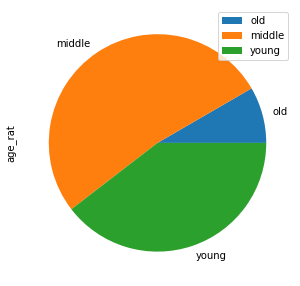

In [26]:
#각 연령의 비율을 시각화한다. 
dfage = pd.DataFrame({'age_rat': [o, m , y]}, index=['old', 'middle', 'young'])
plot = dfage.plot.pie(y='age_rat', figsize=(5, 5))

* 기존의 지식만으로 예상한 가설1 과는 반대로, <br> 실제 데이터에서 고령 인구가 차지하는 비율은 전체의 10% 미만이었다.
* [2017년 주민등록인구통계 보고서]를 참고하여 예상과는 다른 결과를 보인 원인을 분석한 결과,<br> 전체 인구 중 65세 이상 고령인구가 차지하는 비중이 13.2%에 그치며 제주도 인구의 연령구성에 의한 영향이 존재함을 알 수 있었다. <br><br>
* [인사이트] 이와 관련하여 2017년을 기준으로 전국 노령화지수와 제주도의 노령화지수를 비교한 결과,<br>제주특별자치도의 경우는 전체 인구구성 중 노령화지수가 <u>92.2</u>로 전국 기준 노령화지수인 <u>107.7</u>에 비해 현저히 낮음을 확인하였다.<br> -> 제주도의 경우 연령구성비율이 내륙과 차이가 있으며, 생산가능인구의 비율이 높은 비교적 '젊은' 지역임을 알 수 있다.

### 가설2의 확인을 위해 각 직업군 별 구성비율과 가계수지지표사이의 상관관계를 파악해본다.????????????<br><br><br><br><

### 결론 

* 이곳에 도출한 인사이트를 정리한다. 
* 이를 활용할 수 있는 서비스, 연구주제 등 application을 제시한다.

### [참고자료]
* 제주특별자치도 통계자료 : https://www.jeju.go.kr/open/stats/list/grdp.htm?act=view&seq=1161716
* 서귀포시 통계자료 : 2017년 주민등록인구통계 보고서 , https://www.seogwipo.go.kr/info/stats/resident.htm?act=download&seq...no=1
